In [1]:
import matplotlib.pyplot as plt
import pyplotbrookings.pyplotbrookings as ppb
import numpy as np

# Brookings plot theme for all plots
ppb.set_theme()

## Viewing Palettes

You can preview any palette using `view_palette()`! The numbers indicate the palette order and text color is adherent to W3C guidelines (in case you need to place black or white text on top of any palette colors). Lets look at some of the color palettes.

A list of all palettes this can be found in the doc string of `get_palette()` or by adding the `list_supported=True` argument in the `get_palette()` function.

In [2]:
print(ppb.get_palette('', list_supported=True))

['1-color A', '1-color B', '2-color A', '2-color B', '3-color A', '3-color B', '4-color A', '4-color B', '5-color', '6-color', 'sequential (single hue)', 'sequential (two hues)', 'diverging', 'vivid blue palette', 'orange palette', 'paired', 'pos-neg A', 'pos-neg B', '2-political A', '2-political B', '3-political A', '3-political B', 'brand blue', 'vivid blue', 'teal', 'green', 'yellow', 'orange', 'red', 'magenta', 'purple', 'gray']


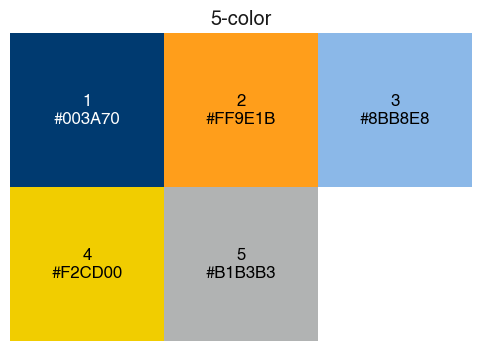

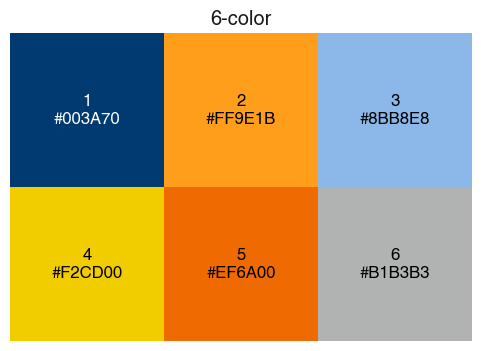

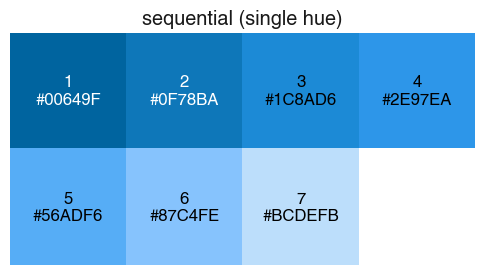

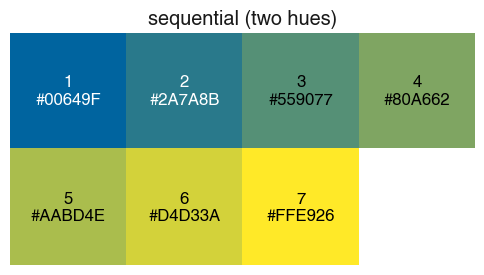

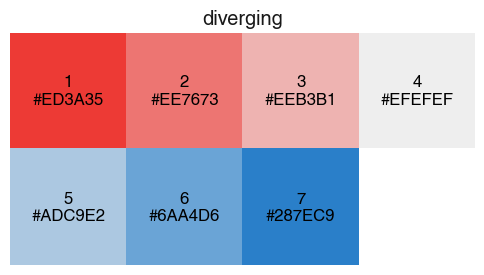

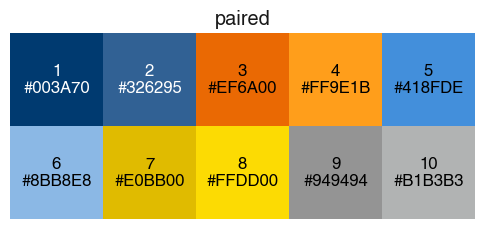

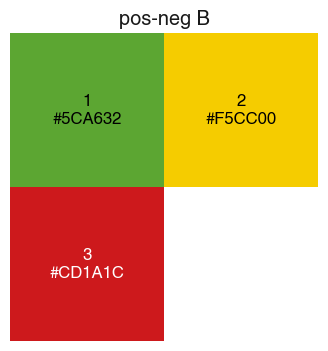

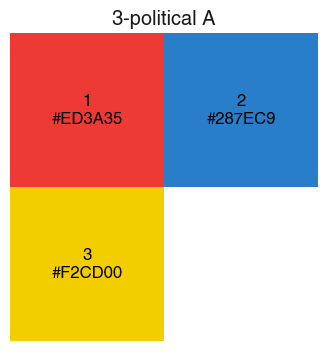

In [3]:
# Preview color palettes and the correct text color (black or white) that can be applied on top of each color
preview_palettes = [
    '5-color', '6-color', 'sequential (single hue)', 'sequential (two hues)',
    'diverging', 'paired', 'pos-neg B', '3-political A']

for p in preview_palettes:
    plt.title(p)
    ppb.view_palette(p)

We can also preview some of the extended Brookings palettes.

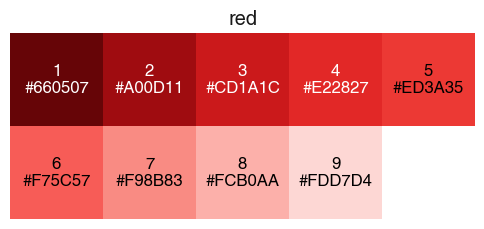

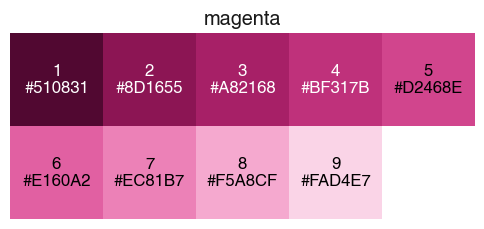

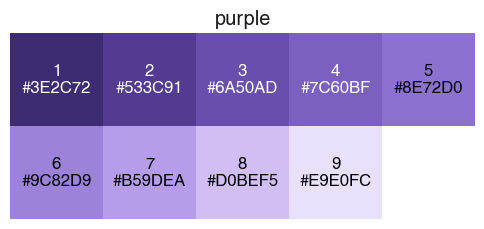

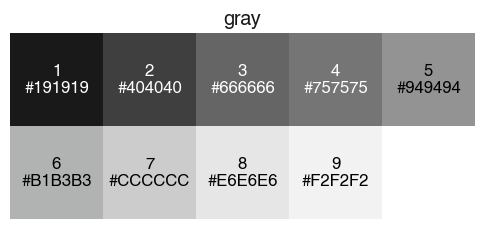

In [4]:
# Preview color palettes and the correct text color (black or white) that can be applied on top of each color
for p in ppb.get_palette('', list_supported=True)[-4:]:
    plt.title(p)
    ppb.view_palette(p)

## Creating Palettes

If you need a palette that is more dynamic than the ones in the base palettes you can even make your own! 

For example, say you needed the `sequential (two hues)` palette with 5 hues instead of 7 hues. First we will access the blue and yellow color values from the Brookings band palettes using `ppb.get_color()`. Then we can add these colors to the package palettes using `ppb.make_palette()` (with `n=5` to indicate that we would like to linearly interpolate between the blue and yellow colors to create a total of five hues). Finally we will add a name to this palette for access later on (in this case we named the palette `5-sequential (two hues)`). 

In [5]:
# Getting the "sequential (two hues)" colors
colors = [ppb.get_color('vivid blue 70'), ppb.get_color('yellow 30')]
print(colors)
# Creating a new palette
ppb.make_palette(colors, 5, '5-sequential (two hues)')

['#0061A0', '#FFE926']


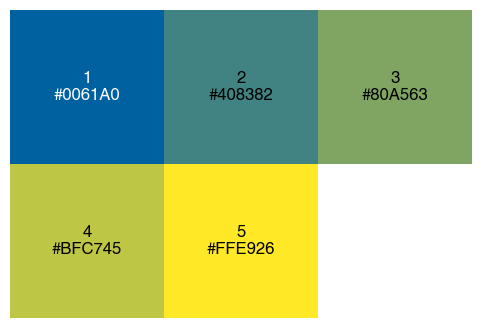

In [6]:
ppb.view_palette('5-sequential (two hues)')

Alternatively we could create an entirely new palette! 

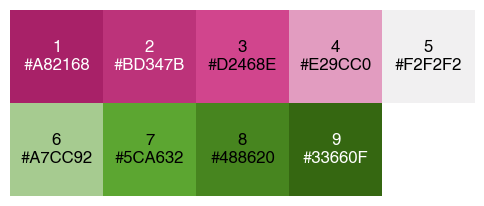

In [7]:
# Adding gray as a mid-point color to create a diverging color palette
colors = [ppb.get_color('magenta 70'),
          ppb.get_color('magenta 50'),
          ppb.get_color('gray 10'),
          ppb.get_color('green 50'),
          ppb.get_color('green 70')]

ppb.make_palette(colors, 9, 'magenta-green diverging')
ppb.view_palette('magenta-green diverging')

Custom made palettes can also be turned into continuous colormaps using `ppb.get_cmap()`

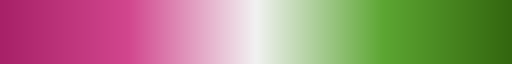

In [8]:
ppb.get_cmap('magenta-green diverging')

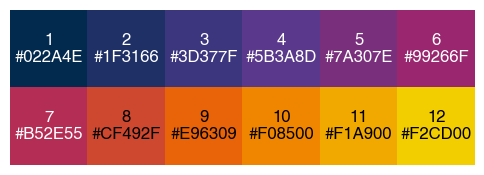

In [9]:
# Creating a plasma colormap with Brookings colors
colors = [ppb.get_color('brand blue 90'), 
          ppb.get_color('purple 80'), 
          ppb.get_color('magenta 70'), 
          ppb.get_color('orange 60'), 
          ppb.get_color('yellow 50')]

ppb.make_palette(colors, 12, 'plasma')
ppb.view_palette('plasma')

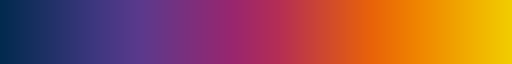

In [10]:
ppb.get_cmap('plasma')

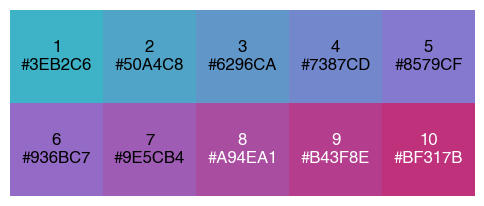

In [11]:
# Creating the cool color palette
colors = [ppb.get_color('teal 40'), ppb.get_color('purple 50'), ppb.get_color('magenta 60')]
ppb.make_palette(colors, 10, 'cool')
ppb.view_palette('cool')

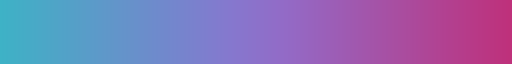

In [12]:
ppb.get_cmap('cool')

### Lightness of colormaps

It's a good idea to check the lightness of your colormap(s). If color values are important for communicating data you may want to consider one of the "Perceptually Uniform Sequential" colormaps packaged with matplotlib (or make sure your colormap lightness is linear).

https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [13]:
def cmap_lightness(name, mpl_cmap=False, ax=None, start=0, **kwargs):
    '''
    Returns a plot of a colormaps lightness
    
    name (str): Name of the colormap
    
    mpl_cmap (bool): True if the colormap from matplotlib
    '''
    
    def lightness(rgb_color):
        '''
        Returns color luminosity
        
        rgb_color (str): rgb values of color
        
        @Sources: Mark Ransom (https://stackoverflow.com/questions/3942878/
        how-to-decide-font-color-in-white-or-black-depending-on-background-color)
        
        Myndex: (https://stackoverflow.com/questions/596216/formula-to-determine-
        perceived-brightness-of-rgb-color)
        '''       
        # Adjusting RGB values
        rgb_new = []
        for c in rgb_color:
            c = c / 255.0
            if c <= 0.04045:
                c = c/12.92 
            else:
                c = ((c+0.055)/1.055) ** 2.4
            rgb_new.append(c)
        # Getting color luminosity (Y)
        Y = 0.2126 * rgb_new[0] + 0.7152 * rgb_new[1] + 0.0722 * rgb_new[2]
        
        # Luminosity (Y) to brightness (L*)
        if Y <= (216/24389):
            L = Y * (24389/27)
        else:
            L = (Y ** (1/3)) * 116 - 16
            
        return (L / 0.25)*100

    if ax is None:
        ax=plt.gca()
    
    # X values of plot
    x = np.linspace(start, start+1, 500)
    c = np.linspace(0, 1, 500)
    
    if mpl_cmap:
        cmap = plt.get_cmap(name, **kwargs)
    else:
        cmap = ppb.get_cmap(name, **kwargs)

    ax.scatter(x=x, y=[lightness(cmap(i)[:-1]) for i in c], c=cmap(c), s=400)
    ax.set_ylabel('Lightness (L*)')
    ax.set_xticks([]);

    ax.set_ylim(0, 115)
    ax.set_xlim(-0.2, 1.2)

    
def compare_maps(custom, matplotlib):
    '''
    Compare a custom colormap with a matplotlib
    colormap.
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    cmap_lightness(custom, ax=ax1)
    cmap_lightness(matplotlib, mpl_cmap=True, ax=ax2)

    ax1.set_title('Custom Colormap')
    ax2.set_title('Matplotlib Colormap')
    
    ax2.set_ylabel(' ')
    

def palettes_lightness(palettes, skip=1, palette=False):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    for i, name in enumerate(palettes):
        if palette:
            cmap_lightness(name, ax=ax, start=i*skip, N=len(ppb.get_palette(name)))
        else:
            cmap_lightness(name, ax=ax, start=i)
    ax.set_xlim(-0.5, i+1.5)
    ax.set_xticks(np.arange(0, len(palettes)*skip, skip), palettes)
    
    return ax

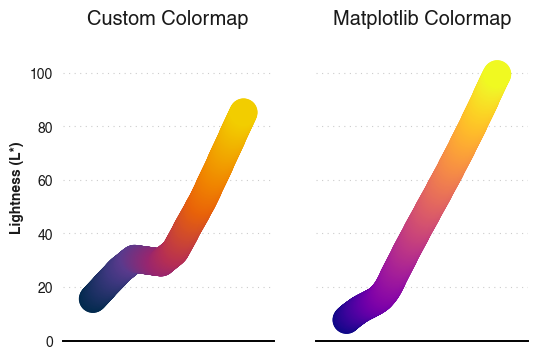

In [14]:
compare_maps('plasma', 'plasma')

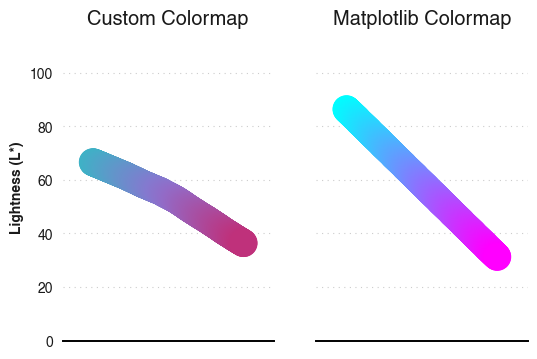

In [15]:
compare_maps('cool', 'cool')

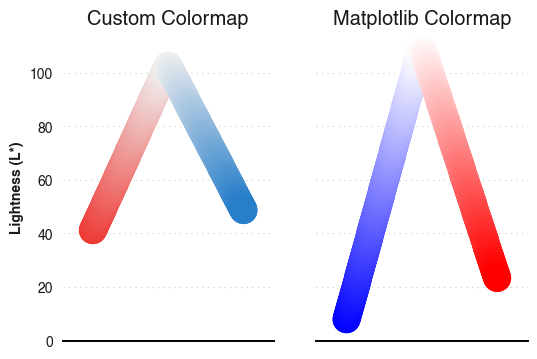

In [16]:
compare_maps('diverging', 'bwr')

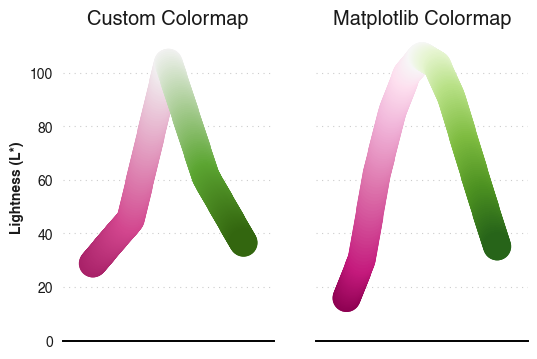

In [17]:
compare_maps('magenta-green diverging', 'PiYG')

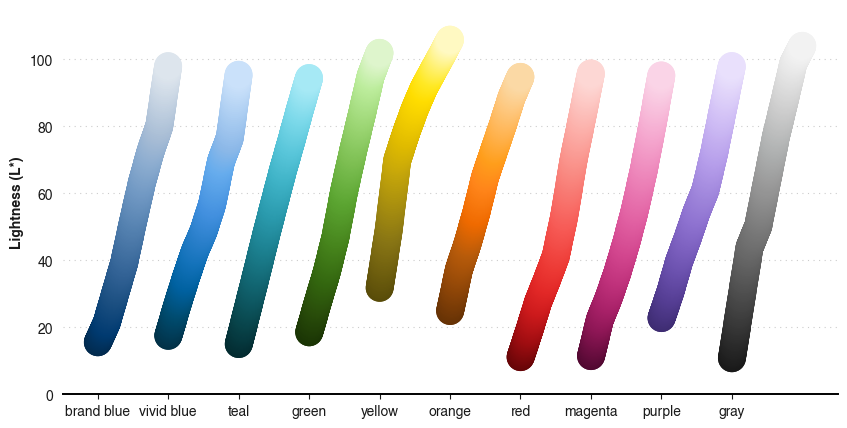

In [18]:
# Lightness for the extended brookings palettes
palettes = ['brand blue', 'vivid blue', 'teal', 'green', 'yellow', 'orange', 'red', 'magenta', 'purple', 'gray']
palettes_lightness(palettes)
ppb.save('cmaps1.png');

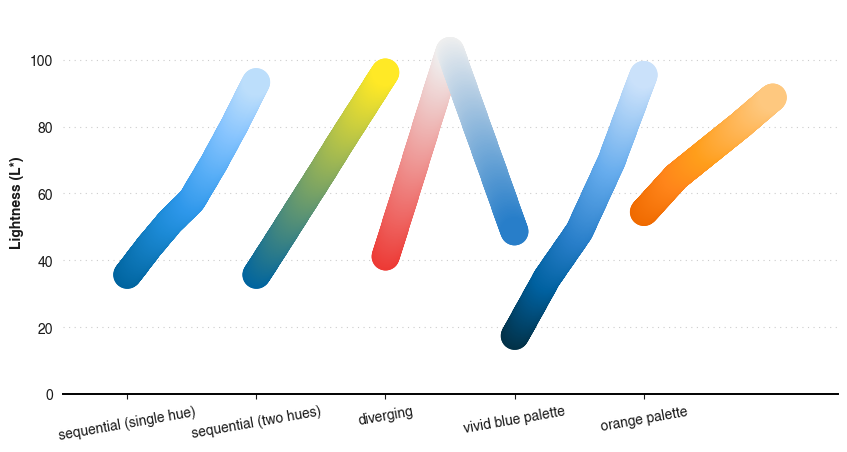

In [19]:
# Lightness for the sequential brookings palettes
palettes = ['sequential (single hue)', 'sequential (two hues)', 'diverging', 'vivid blue palette', 'orange palette']
palettes_lightness(palettes)
plt.xticks(rotation=10);
ppb.save('cmaps2.png');

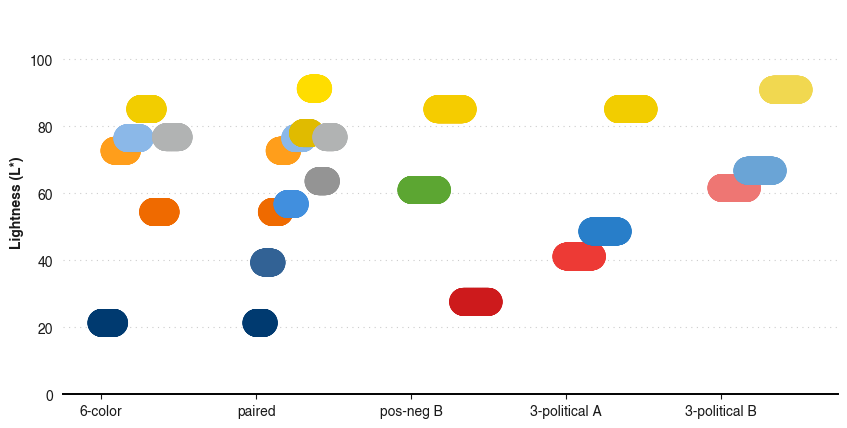

In [20]:
# Lightness for the categorical Brookings palettes
palettes = ['6-color', 'paired', 'pos-neg B', '3-political A',  '3-political B']
palettes_lightness(palettes, skip=2, palette=True)
plt.xlim(-0.5, 9.5)
ppb.save('cmaps3.png');